In [ ]:
#1 Testing the development environment (Python 3 + OpenCV3)

import sys
import cv2
import numpy as np

#checking version of python
print('Python - ',sys.version_info[:])

#checking version of opencv3
print('OpenCV - ',cv2.__version__)

#checking version of numpy
print('Numpy - ',np.__version__)

In [ ]:
#2 Applying hough transform, to detect the horizon

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

image = mpimg.imread('files/houghLines.jpg')
gray  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, 50,400)

lines = cv2.HoughLines( edges, 1 , np.pi / 180, 200)

rho,theta = lines[7][0]
x  = np.cos(theta)
y  = np.sin(theta)
x0 = x * rho
y0 = y * rho
x1 = int(x0 + 1000 * (-y))
y1 = int(y0 + 1000 * (x))
x2 = int(x0 - 1000 * (-y))
y2 = int(y0 - 1000 * (x))
    
# we now obtained the end points of the lines, lets plot them
    
cv2.line(image, (x1, y2), (x2, y2), (0,0,255), 2)

plt.figure("Hough Line Transform")

plt.imshow(image)
plt.title('Horizon')
plt.show()

In [ ]:
#3 Applying hough transform, to circles in an image

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook


image = mpimg.imread('files/houghCircles.jpg')

gray     = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred  = cv2.GaussianBlur(gray, (5,5), 0)
circles  = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 120, param1=50, param2=30, minRadius=50, maxRadius=90)


for i in circles[0,:]:
    #draw the outer circle
    cv2.circle(image, (i[0], i[1]), i[2], (0,255,0), 2)
    
    #draw the center of the circle
    cv2.circle(image, (i[0],i[1]), 2, (0,0,255), 3)

plt.figure("Hough Circle Transform")    
plt.gray()    
plt.imshow(image)
plt.title('Coins')
plt.show()

In [ ]:
#4 Stretch and Shrink an Image

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

image = mpimg.imread('files/lena.jpg')

scaleup   = cv2.resize(image, None, fx=2, fy=2,interpolation=cv2.INTER_CUBIC)
scaledown = cv2.resize(image, None, fx=0.5, fy=0.5,interpolation=cv2.INTER_AREA)

plt.figure("Stretch and Shrink")

plt.subplot(131)
plt.imshow(image)
plt.title("Original Image")


plt.subplot(132)
plt.imshow(scaleup)
plt.title("Stretched Image [2x]")


plt.subplot(133)
plt.imshow(scaledown)
plt.title("Shrinked Image [0.5x]")


plt.tight_layout()

plt.show()

In [ ]:
#5 Affine and Perspective Transform using OpenCV3

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

affImg  = mpimg.imread("files/affine.jpg")
persImg = mpimg.imread("files/sudoku_small.jpg")

rows1,cols1,ch1 = affImg.shape

apts1 = np.float32([[185,814],[284,493],[882,690]])
apts2 = np.float32([[100,787],[140,455],[786,551]])

M1 = cv2.getAffineTransform(apts1,apts2)
affTrans = cv2.warpAffine(affImg,M1,(cols1,rows1))

ppts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
ppts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M2 = cv2.getPerspectiveTransform(ppts1,ppts2)
persTrans = cv2.warpPerspective(persImg,M2,(300,300))


plt.figure("Affine and Perspective Transform")

plt.subplot(221)
plt.imshow(affImg)
plt.title("Original Image")
plt.axis("off")

plt.subplot(222)
plt.imshow(affTrans)
plt.title("Affine Transform")
plt.axis("off")

plt.subplot(223)
plt.imshow(persImg)
plt.title("Original Image")
plt.axis("off")

plt.subplot(224)
plt.imshow(persTrans)
plt.title("Perspective Transform")
plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
#6 Rotation using OpenCV3

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

def rotateImage(image, angle):
    center=tuple(np.array(image.shape[0:2])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    return cv2.warpAffine(image, rot_mat, image.shape[0:2],flags=cv2.INTER_LINEAR)

img  = mpimg.imread('files/pikachu.png')
rImg = rotateImage(img,90)

plt.figure('Image Rotation')
plt.subplot(121),plt.imshow(img),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(rImg),plt.title('Rotated Image'),plt.axis('off')

plt.show()

In [ ]:
#7 Sobel Filter Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# This line suppresses runtime error warnings like divide-by-zero
np.seterr(divide='ignore', invalid='ignore')

image = mpimg.imread('files/checks.jpg')

# Apply sobel filter in X-direction
Gx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)

# Apply sobel filter in Y-direction
Gy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

# Finding the magnitude of the sobel filter
Gxy = np.sqrt(Gx * Gx + Gy * Gy)

# Lets also calculate the angle of the edges, relative to the pixel grid
try:
    theta = np.arctan(Gy/Gx)
except Exception:
    print("Hello")
    pass


plt.figure("Sobel Filter")

plt.subplot(231), plt.imshow(image,cmap="gray"),  plt.title("Original"),plt.axis("off")
plt.subplot(232), plt.imshow(Gx,cmap="gray"), plt.title("GX"),plt.axis("off")
plt.subplot(233), plt.imshow(Gy,cmap="gray"), plt.title("GY"),plt.axis("off")
plt.subplot(234), plt.imshow(Gxy,cmap="gray"), plt.title("GXY"),plt.axis("off")
plt.subplot(235), plt.imshow(theta,cmap="gray"), plt.title("Orientation"),plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
#8 Laplacian Derivative Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

image  = mpimg.imread('files/checks.jpg')
limage = cv2.Laplacian(image,cv2.CV_64F)

plt.figure("Laplacian Derivative")

plt.subplot(121), plt.imshow(image,cmap="gray"),  plt.title("Original"),plt.axis("off")
plt.subplot(122), plt.imshow(limage,cmap="gray"), plt.title("Laplacian Derivative"),plt.axis("off")

plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


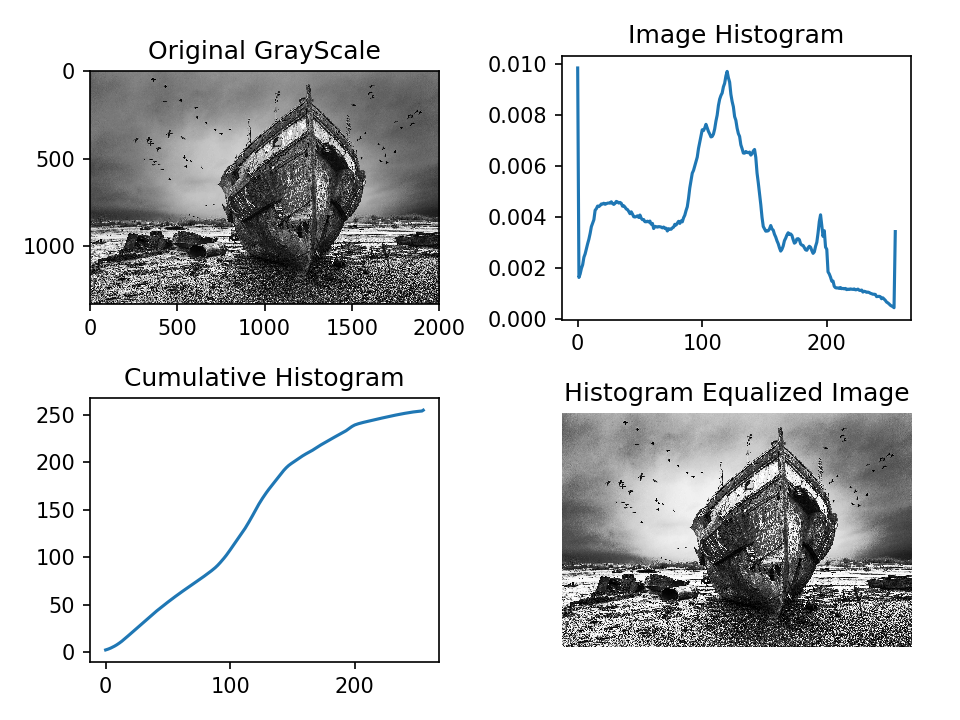

In [2]:
#9 Histogram Equalization Example

from PIL import Image
from numpy import *
from pylab import *

%matplotlib notebook

def histeq(im,nbr_bins=256):
    """ Histogram Equalization of a grayscale image """

    # create a image histogram
    # HINT: you may use the histogram function from the numpy library
    
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)

    subplot(222)
    
    title('Image Histogram')
    
    plot(imhist)
    
    
    # getting the cummulative distribution function
    # HINT: check the function cumsum of the numpy histogram class
    
    cdf = imhist.cumsum()
    
    
    # normalize the cumulative distribution function, by dividing each value by max and multiplying with 255
    # so that the maximum get the value 255.
    # HINT: the last value in the output of cumsum function, we get the total sum, which can be used to normalize
    
    cdf = 255 * cdf / cdf[-1]

    subplot(223)
    title('Cumulative Histogram')
    plot(cdf)    

    # use linear interpolation of cdf to find new pixel values
    # HINT: make using of the numpy interpolation api to find new pixel points based on cdf 
    
    im2 = interp(im.flatten(), bins[:-1], cdf)

    return im2.reshape(im.shape),cdf

im = array(Image.open('files/shipwreck.jpg').convert('L'))

figure('Demonstraring Histogram Equalization')

gray()

subplot(221)
title('Original GrayScale')
imshow(im)

im2,_ = histeq(im)
subplot(224)
title('Histogram Equalized Image')
imshow(im2)

axis('off')

tight_layout()
show()